# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [4]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [9]:
# Nombres de las columnas del dataset de Iris
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


# Dataset url
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


# Load the dataset from HHDD
df = pd.read_csv(dataset_url, names=column_names)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [10]:
# prompt: Get a general 'feel' of the data

# View the first few rows of the dataframe
print(df.head())
print(df.tail())




   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


2. Drop rows with any missing values


In [11]:

df.dropna(inplace=True)

3. Encoding the class label categorical column: from string to num


In [12]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
df['species'] = df['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


#Visualize the dataset
print(df)


     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# If necesary, drop out non necesary columns


5. Scatter plot of the data

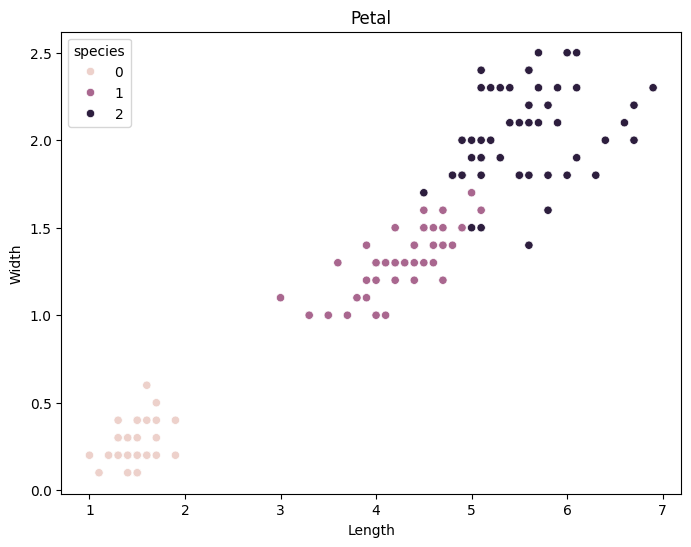

In [13]:
# prompt: Scatter plot of the data petal, length  vs width

# Scatter plot of petal length vs petal width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

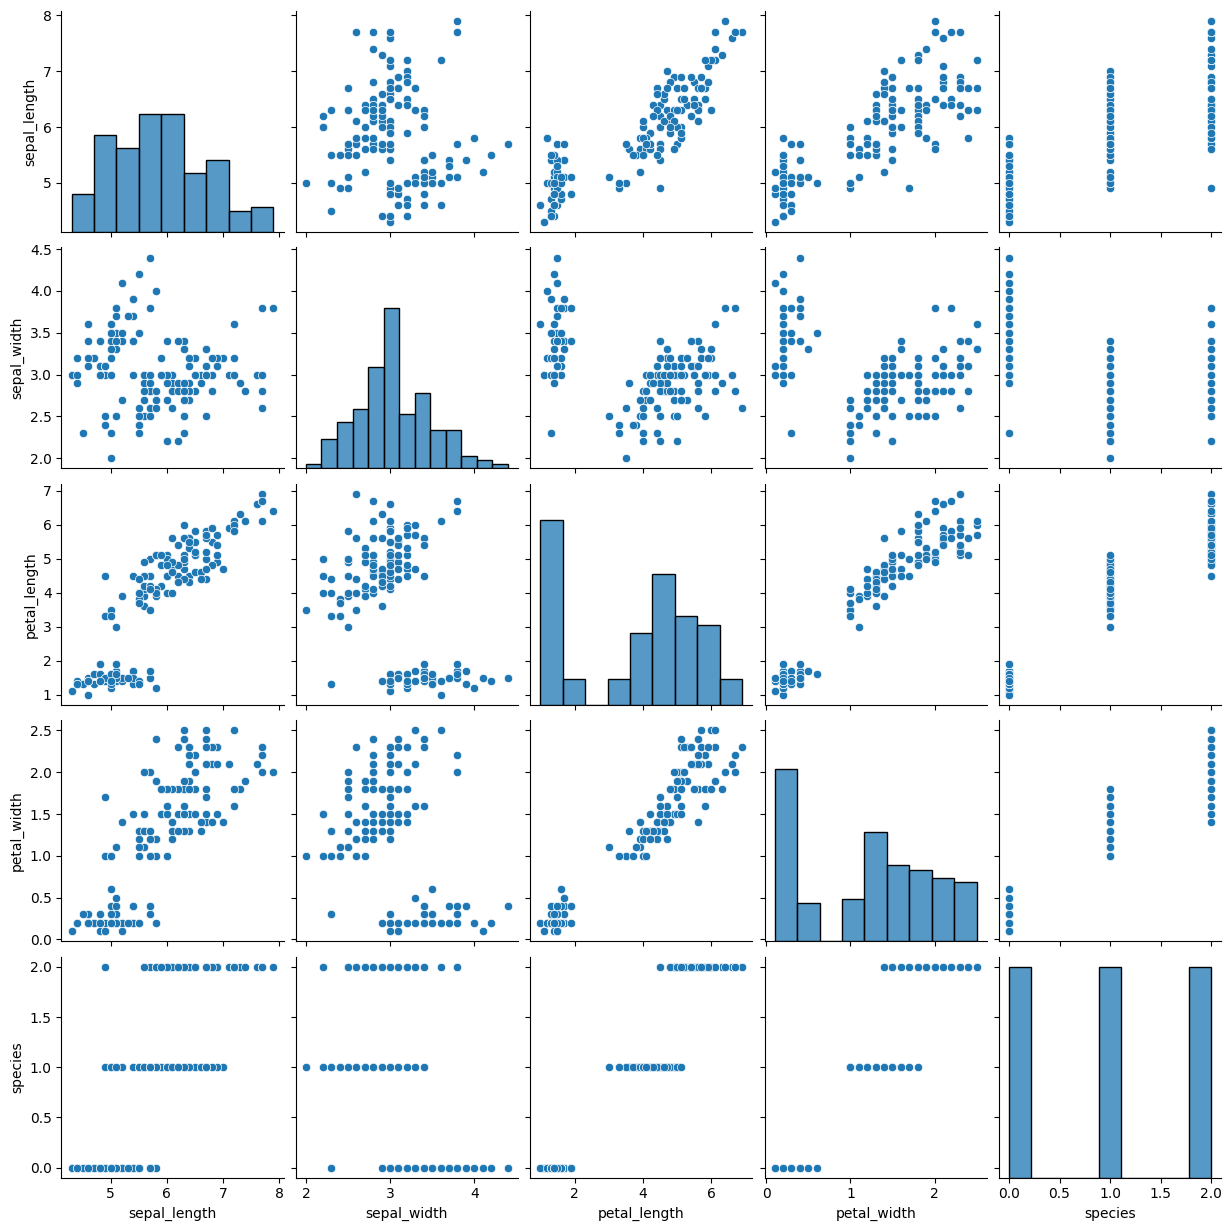

In [14]:
# Pairplot: Scatterplot of all variables

sns.pairplot(df)
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

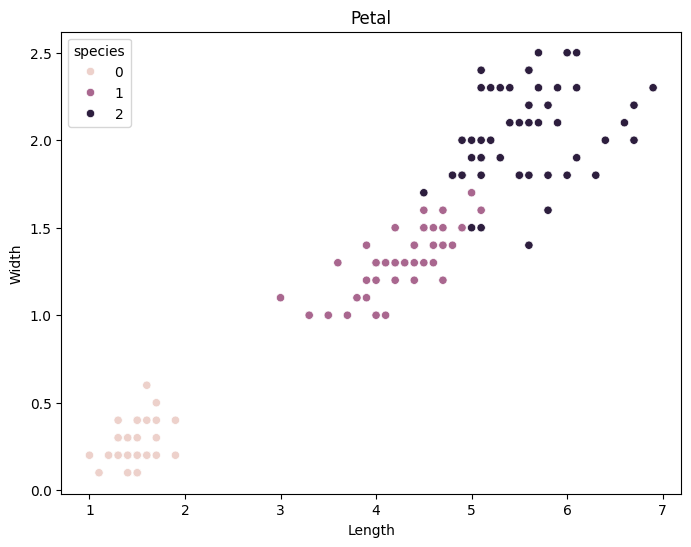

In [15]:
# Get dataframes for each real cluster

plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [18]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
num_clusters = 3

# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df.iloc[:, :-1])

# Print estimated cluster of each point in the dataset
print("Estimaciones de clusters para cada punto en el dataset:")
print(df[['petal_length', 'petal_width', 'cluster']])

Estimaciones de clusters para cada punto en el dataset:
     petal_length  petal_width  cluster
0             1.4          0.2        1
1             1.4          0.2        1
2             1.3          0.2        1
3             1.5          0.2        1
4             1.4          0.2        1
..            ...          ...      ...
145           5.2          2.3        0
146           5.0          1.9        2
147           5.2          2.0        0
148           5.4          2.3        0
149           5.1          1.8        2

[150 rows x 3 columns]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [20]:
# Manual pairing the labels of the real and estimated clusters
for x in range(len(kmeans.labels_)):
    if kmeans.labels_[x] == 0:
        kmeans.labels_[x] = 2
    elif kmeans.labels_[x] == 1:
        kmeans.labels_[x] = 0
    elif kmeans.labels_[x] == 2:
        kmeans.labels_[x] = 1

print(kmeans.labels_)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [21]:
# Add a new column to the dataset with the cluster information
df['cluster'] = kmeans.labels_
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [24]:
# Label of the estimated clusters
# Get the unique cluster labels
cluster_labels = df['cluster'].unique()

# Print the cluster labels
print("Labels of the estimated clusters:", cluster_labels)

Labels of the estimated clusters: [0 2 1]


In [25]:
# Cluster centroides
kmeans.cluster_centers_


array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [26]:
# Sum of squared error (sse) of the final model
kmeans.inertia_

78.94506582597728

In [27]:
# The number of iterations required to converge
kmeans.n_iter_

12

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

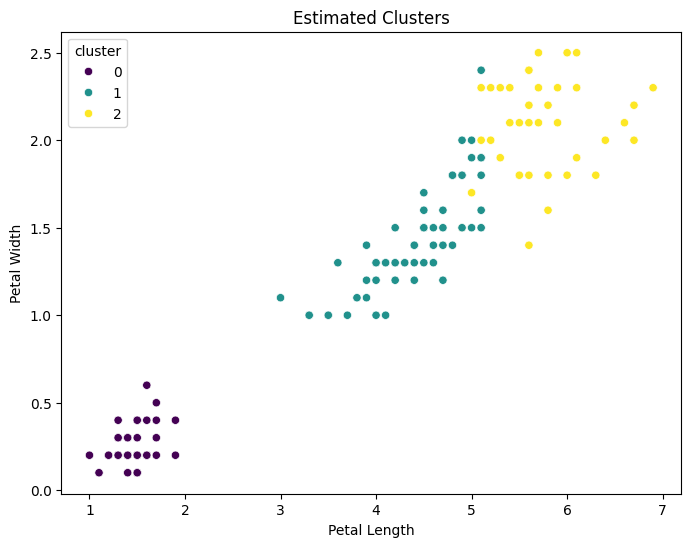

In [28]:
# Scatter plot of petal length vs petal width, colored by estimated clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='cluster', palette='viridis')
plt.title('Estimated Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

## Plot both real and estimated clusters to check for errors

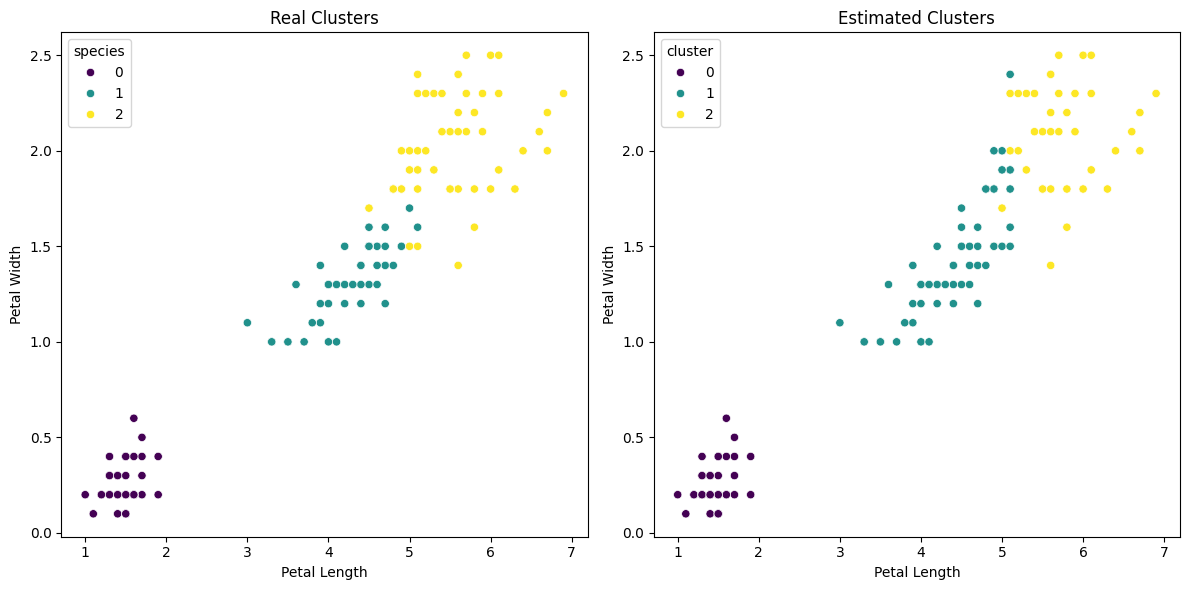

In [30]:
# Assuming 'species' column represents the real clusters and 'cluster' column represents the estimated clusters

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot real clusters on the first subplot
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species', palette='viridis', ax=axes[0])
axes[0].set_title('Real Clusters')
axes[0].set_xlabel('Petal Length')
axes[0].set_ylabel('Petal Width')

# Plot estimated clusters on the second subplot
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='cluster', palette='viridis', ax=axes[1])
axes[1].set_title('Estimated Clusters')
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Petal Width')

# Display the plot
plt.tight_layout()
plt.show()


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [32]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
K = range(1, 6)

# For each k
for k in K:
    # Initialize k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)  # Add random_state for reproducibility
    kmeans.fit(df[['petal_length', 'petal_width']])  # Use correct column names
    sse.append(kmeans.inertia_)


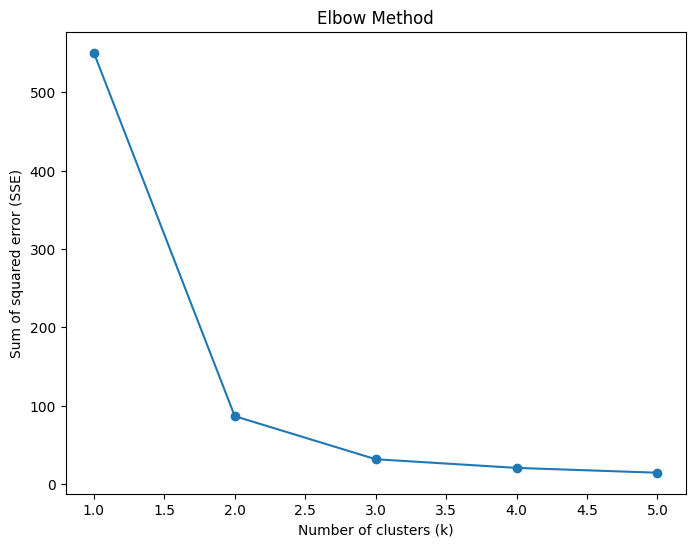

In [33]:
# Plot sse versus k
plt.figure(figsize=(8, 6))
plt.plot(K, sse, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared error (SSE)')
plt.title('Elbow Method')
plt.show()


Choose the k after which the sse is minimally reduced


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k